In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import date
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
#inspector = inspect(engine)
#inspector.get_table_names()
Base.prepare(autoload_with=engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
measurement = Base.classes.measurement
station =Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)
session.query(func.count(measurement.date)).all()

[(19550,)]

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
most_rescent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(most_rescent_date)

('2017-08-23',)


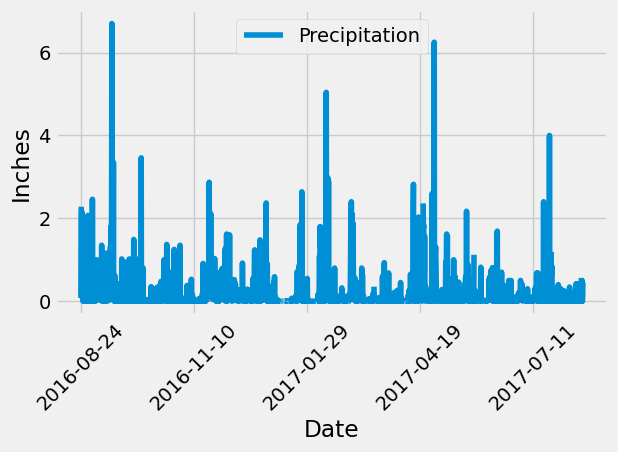

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

latest_date = dt.datetime.strptime(most_rescent_date[0], '%Y-%m-%d')

# Calculate the date one year from the last date in data set.
last_12_months = latest_date - dt.timedelta(days=365)
last_12_months

# Perform a query to retrieve the data and precipitation scores
last12_months__precipitation = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > last_12_months).\
    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
one_year_prcp_df= pd.DataFrame(last12_months__precipitation, columns=['Date','Precipitation'])

# Sort the dataframe by date
one_year_prcp_df.sort_values(by='Date')

# Use Pandas Plotting with Matplotlib to plot the data
one_year_prcp_df.plot(x='Date',y='Precipitation',rot= 45,xlabel='Date',ylabel='Inches')
plt.tight_layout()
plt.show()

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
print (one_year_prcp_df.describe())

       Precipitation
count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.id)).all()

[(9,)]

In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station_count = session.query(measurement.station,func.count(measurement.station)).\
    order_by(func.count(measurement.station).desc()).\
    group_by(measurement.station).all()

    
active_station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_station_count[0][0]
most_active_station

lowest_temperature = session.query(func.min(measurement.tobs)).\
    filter(measurement.station== most_active_station).all()

highest_temperature = session.query(func.max(measurement.tobs)).\
    filter(measurement.station== most_active_station).all()
average_temperature = session.query(func.avg(measurement.tobs)).\
    filter(measurement.station== most_active_station).all()


print(lowest_temperature,highest_temperature,average_temperature)

[(54.0,)] [(85.0,)] [(71.66378066378067,)]


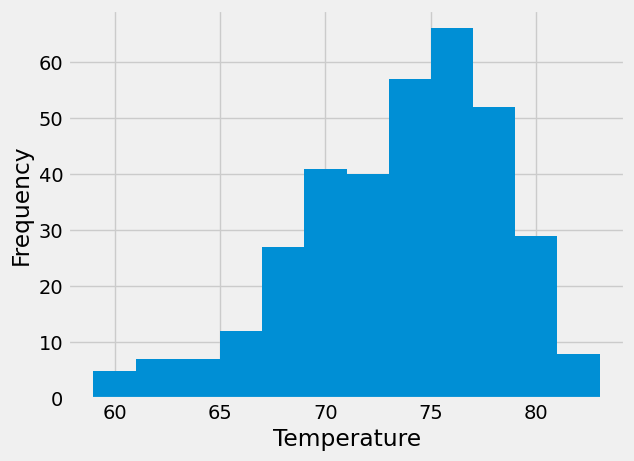

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last12_months_temperature = session.query(measurement.date, measurement.tobs).\
    filter(measurement.date > last_12_months).\
    filter(measurement.station == most_active_station).\
    order_by(measurement.date).all()

#dataframe
one_year_temp_df= pd.DataFrame(last12_months_temperature)['tobs']


hist = one_year_temp_df.hist(bins=12) 
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [18]:
# Close Session
session.close()